In [ ]:
from huggingface_hub import login
login(token="YOUR_TOKEN")

In [ ]:
# Dataset: https://huggingface.co/datasets/solomonk/reddit_mental_health_posts
from datasets import load_dataset
import pandas as pd

ds = load_dataset("solomonk/reddit_mental_health_posts")
df = ds['train'].to_pandas()

Repo card metadata block was not found. Setting CardData to empty.


In [3]:
df.head()

author                                               body  \
0  HotConversation1273  A few months ago I was accepted into this full...   
1           snorefestt  Hey guys, I was curious if anyone else has the...   
2               etyf12   \n\ni have 6 exams in the next 2 weeks one of...   
3    GetHairOrDieTryin  Is there anyone out there that is struggling w...   
4         ZeroTransPat  Whenever I get hungry, I never eat because I d...   

                created_utc      id  num_comments  score subreddit  \
0  2021-12-22T18:32:56.000Z  rmbjwb             1      1      ADHD   
1  2021-12-22T18:24:25.000Z  rmbd1y             3      5      ADHD   
2  2021-12-22T18:22:52.000Z  rmbbvu             1      2      ADHD   
3  2021-12-22T18:20:35.000Z  rmba1t             3      2      ADHD   
4  2021-12-22T18:18:47.000Z  rmb8lm             2      1      ADHD   

                                               title  upvote_ratio  \
0    I get extremely anxious if I’m not working 24/7           1.0   
1  I can't will myself to clean my own house, but...           1.0   
2                                   i need some help           1.0   
3                              Anyone up for a chat?           1.0   
4                     Figuring out what to eat sucks           1.0   

                                                 url  
0  https://www.reddit.com/r/ADHD/comments/rmbjwb/...  
1  https://www.reddit.com/r/ADHD/comments/rmbd1y/...  
2  https://www.reddit.com/r/ADHD/comments/rmbbvu/...  
3  https://www.reddit.com/r/ADHD/comments/rmba1t/...  
4  https://www.reddit.com/r/ADHD/comments/rmb8lm/...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151288 entries, 0 to 151287
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   author        151288 non-null  object 
 1   body          149679 non-null  object 
 2   created_utc   151288 non-null  object 
 3   id            151288 non-null  object 
 4   num_comments  151288 non-null  int64  
 5   score         151288 non-null  int64  
 6   subreddit     151288 non-null  object 
 7   title         151288 non-null  object 
 8   upvote_ratio  151288 non-null  float64
 9   url           151288 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.5+ MB


### Remove unnecessary columns

In [5]:
# score - The number of upvotes for the submission.
df = df[['title', 'body', 'num_comments', 'upvote_ratio', 'score', 'subreddit']]
df['body'] = df['body'].fillna('')
df['title'] = df['title'].fillna('')
df.head(5)

title  \
0    I get extremely anxious if I’m not working 24/7   
1  I can't will myself to clean my own house, but...   
2                                   i need some help   
3                              Anyone up for a chat?   
4                     Figuring out what to eat sucks   

                                                body  num_comments  \
0  A few months ago I was accepted into this full...             1   
1  Hey guys, I was curious if anyone else has the...             3   
2   \n\ni have 6 exams in the next 2 weeks one of...             1   
3  Is there anyone out there that is struggling w...             3   
4  Whenever I get hungry, I never eat because I d...             2   

   upvote_ratio  score subreddit  
0           1.0      1      ADHD  
1           1.0      5      ADHD  
2           1.0      2      ADHD  
3           1.0      2      ADHD  
4           1.0      1      ADHD

In [6]:
# Check which classes we have
df['subreddit'].unique()

array(['ADHD', 'aspergers', 'depression', 'OCD', 'ptsd'], dtype=object)

### Text Preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [9]:
def basic_text_cleaner(text):
    """
    Basic text cleaning including lowercase conversion, 
    punctuation removal, and extra whitespace handling
    """
    if not isinstance(text, str):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def advanced_text_preprocessor(text, remove_stopwords=True, lemmatize=True):
    """
    Advanced preprocessing with tokenization, stopword removal, and lemmatization
    """
    # First apply basic cleaning
    text = basic_text_cleaner(text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
    # Lemmatization
    if lemmatize:
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [10]:
df['title'] = df['title'].apply(lambda x: advanced_text_preprocessor(x))
df['body'] = df['body'].apply(lambda x: advanced_text_preprocessor(x))

In [11]:
df.head(5)

title  \
0                get extremely anxious ’ working 247   
1  cant clean house feel incredibly motivated cle...   
2                                          need help   
3                                        anyone chat   
4                                  figuring eat suck   

                                                body  num_comments  \
0  month ago accepted full time software engineer...             1   
1  hey guy curious anyone else issue apartment fu...             3   
2  6 exam next 2 week one monday havent studied f...             1   
3  anyone struggling addadhd ’ interesting chatti...             3   
4  whenever get hungry never eat dont know eat en...             2   

   upvote_ratio  score subreddit  
0           1.0      1      ADHD  
1           1.0      5      ADHD  
2           1.0      2      ADHD  
3           1.0      2      ADHD  
4           1.0      1      ADHD

### Some graphs

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
def plot_subreddit_charts(df):
    # Count the occurrences of each subreddit
    subreddit_counts = df['subreddit'].value_counts()
    # Pie Chart
    plt.figure(figsize=(10, 6))
    plt.pie(subreddit_counts, labels=subreddit_counts.index, autopct='%1.1f%%')
    plt.title('Pie Chart of Subreddit Distribution')
    plt.show()
    # Bar Chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values)
    plt.title('Bar Chart of Subreddit Distribution')
    plt.xticks(rotation=45)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Word Cloud for 'title' and 'body' columns for each subreddit ---
def plot_wordclouds(df):
    subreddits = df['subreddit'].unique()
    for subreddit in subreddits:
        # Filter data for the current subreddit
        sub_df = df[df['subreddit'] == subreddit]

        # Combine all titles and bodies into a single string
        title_text = ' '.join(sub_df['title'].dropna().astype(str))
        body_text = ' '.join(sub_df['body'].dropna().astype(str))

        # Generate and plot word cloud for titles
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Titles - {subreddit}')
        plt.axis('off')
        plt.show()

        # Generate and plot word cloud for bodies
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(body_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Bodies - {subreddit}')
        plt.axis('off')

def plot_histograms(df):
    # Histogram for 'num_comments'
    plt.figure(figsize=(10, 6))
    # remove outliers for the plotting purposes
    tmp = df.copy()
    tmp = tmp[tmp['num_comments'] < 100]
    sns.histplot(tmp['num_comments'], bins=30, kde=True)
    plt.title('Histogram of Number of Comments')
    plt.xlabel('Number of Comments')
    plt.ylabel('Frequency')
    plt.show()

    # Histogram for 'upvote_ratio'
    plt.figure(figsize=(10, 6))
    sns.histplot(df['upvote_ratio'], bins=30, kde=True)
    plt.title('Histogram of Upvote Ratio')
    plt.xlabel('Upvote Ratio')
    plt.ylabel('Frequency')
    plt.show()

def plot_word_count_histograms(df):
    # Calculate word count for 'title' column
    df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
    # Calculate word count for 'body' column
    df['body_word_count'] = df['body'].apply(lambda x: len(str(x).split()))
    # ignore outliers
    tmp = df.copy()
    tmp = tmp[tmp['body_word_count'] < 1000]
    # Plot histogram for 'title_word_count'
    plt.figure(figsize=(10, 6))
    sns.histplot(df['title_word_count'], bins=30, kde=True)
    plt.title('Histogram of Word Count in Title')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()
    # Plot histogram for 'body_word_count'
    plt.figure(figsize=(10, 6))
    sns.histplot(tmp['body_word_count'], bins=30, kde=True)
    plt.title('Histogram of Word Count in Body')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.show()

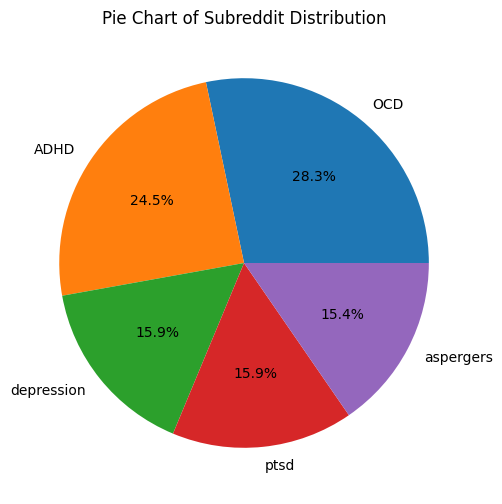

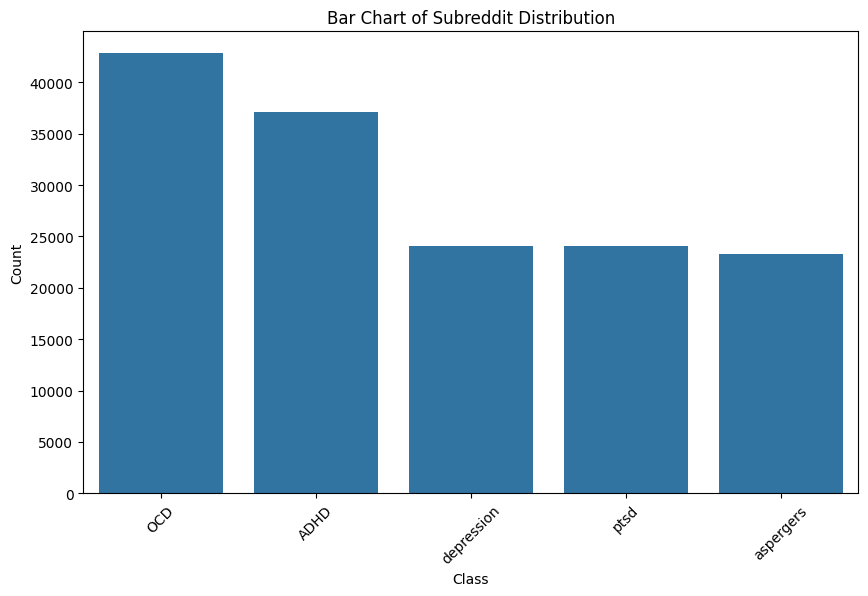

In [14]:
# pie chart and bar chart to see the class distribution
plot_subreddit_charts(df)

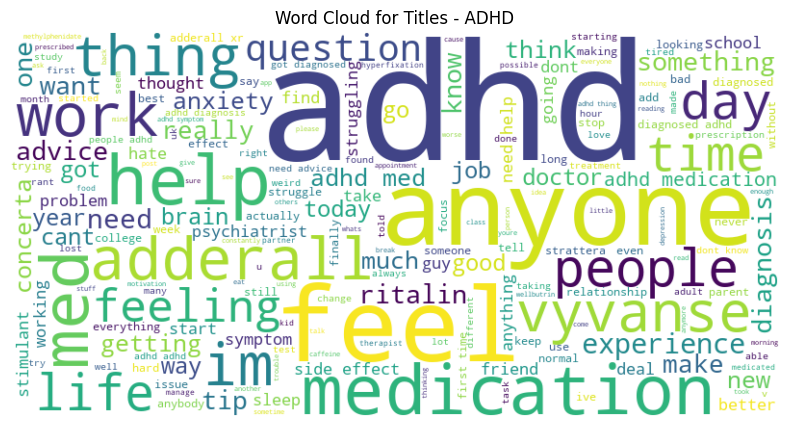

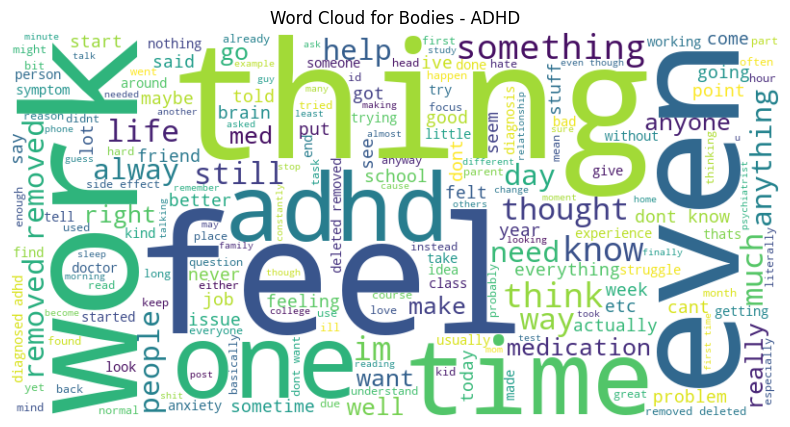

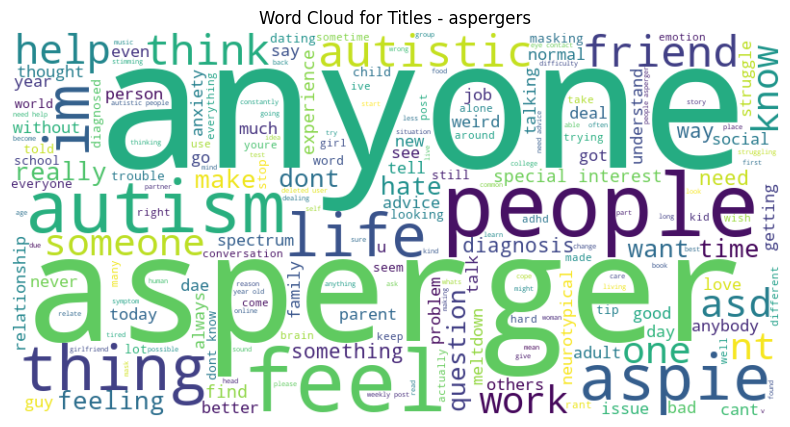

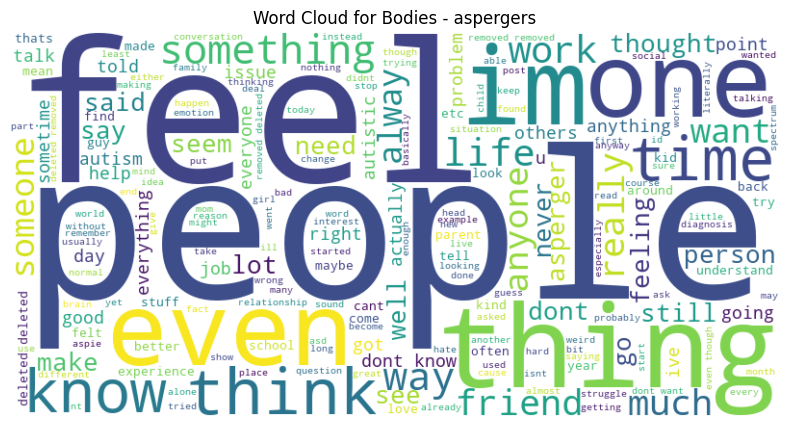

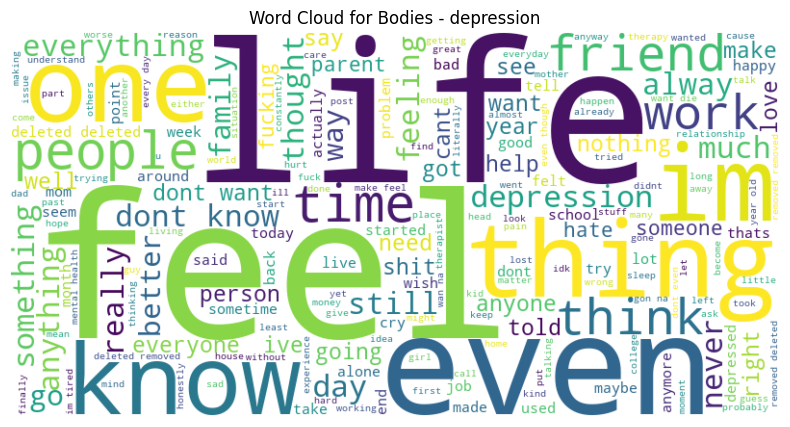

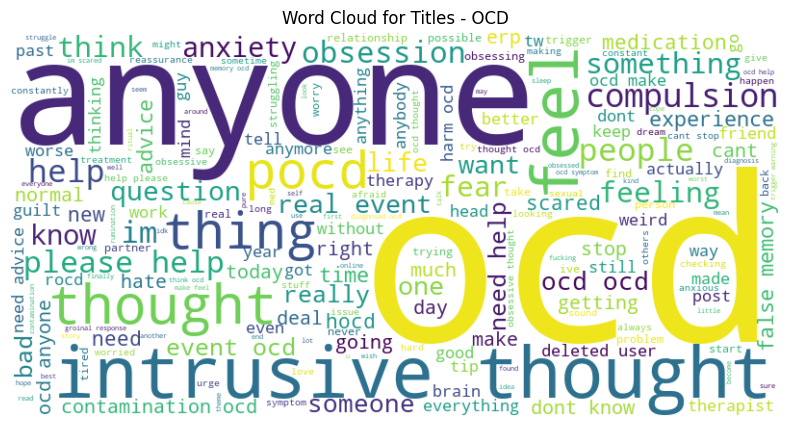

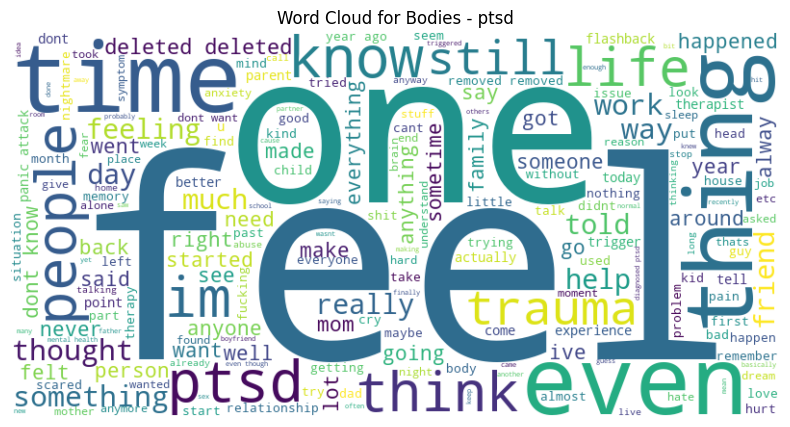

In [15]:
# see wordclouds for each of the classes (title and body)
plot_wordclouds(df)

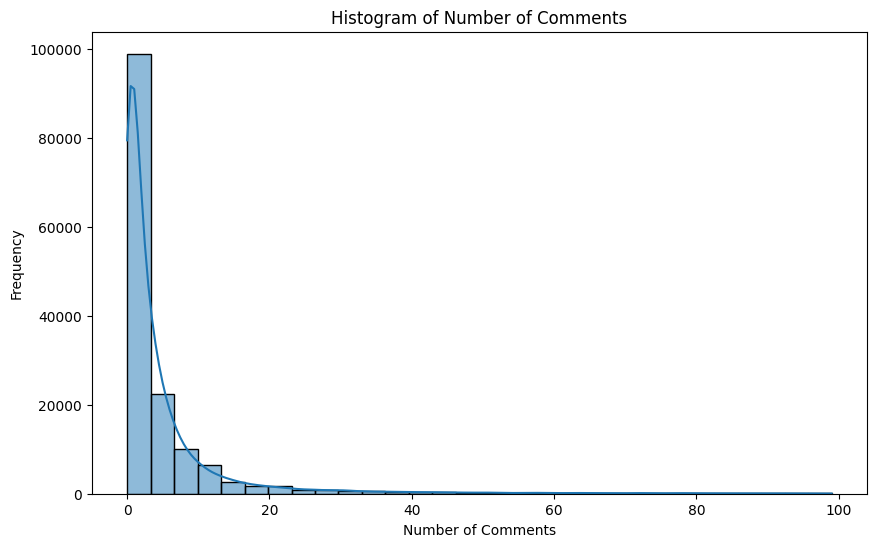

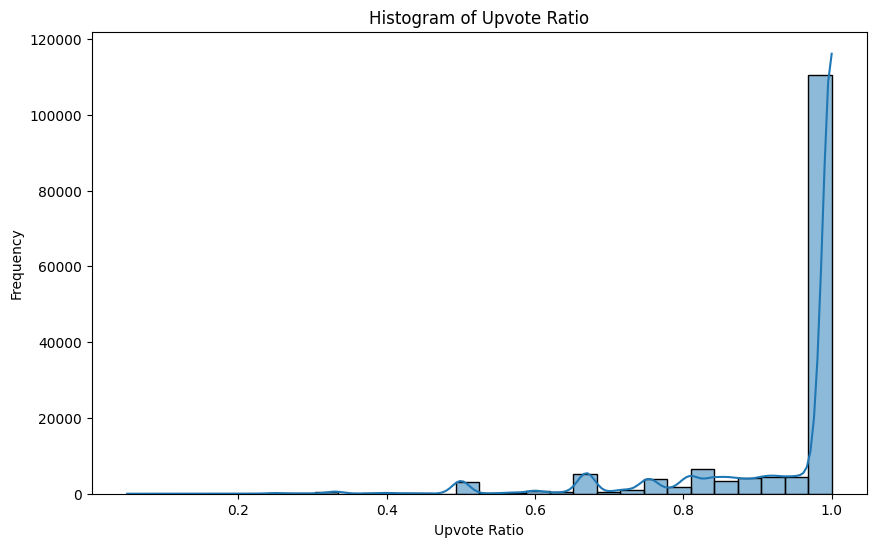

In [20]:
plot_histograms(df)

In [21]:
df['num_comments'].describe(percentiles=[.05, .1, .25, .5, .75, .9, .95, .99])

count    151288.000000
mean          6.816317
std          30.266073
min           0.000000
5%            0.000000
10%           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
90%          12.000000
95%          23.000000
99%          87.000000
max        2944.000000
Name: num_comments, dtype: float64

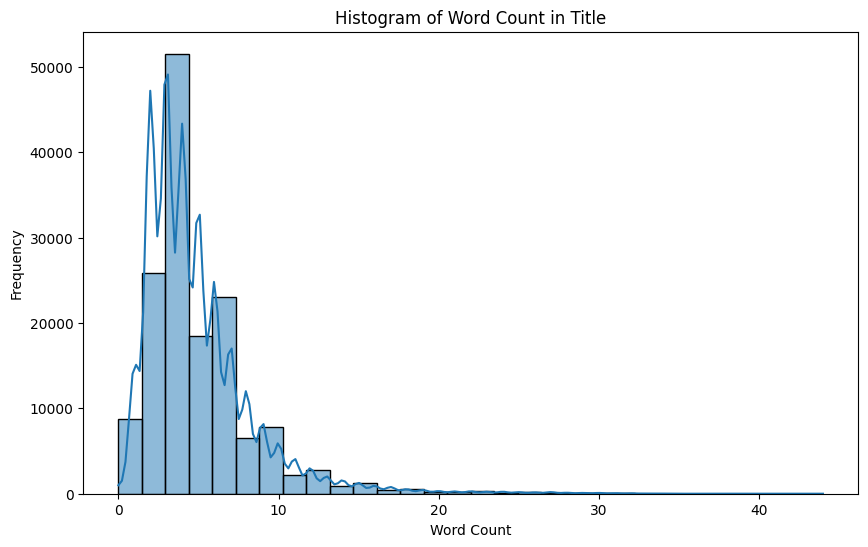

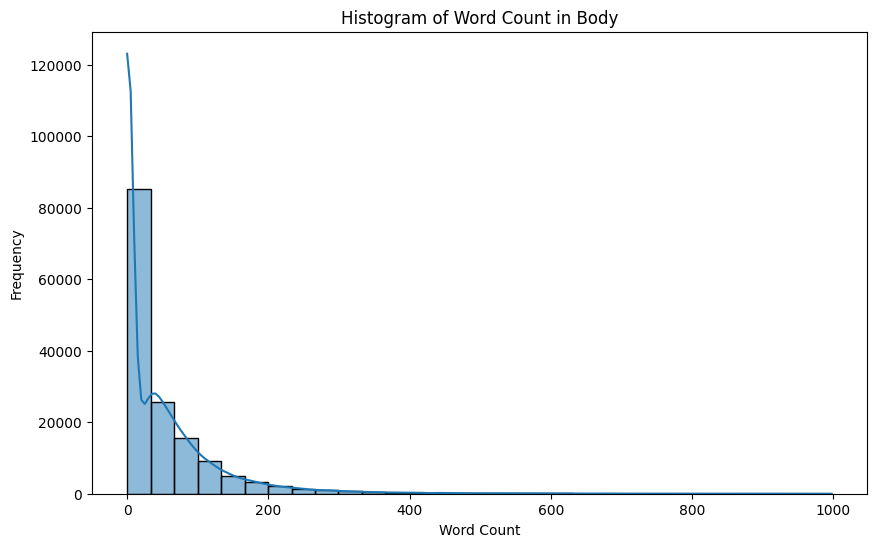

In [26]:
plot_word_count_histograms(df)

In [28]:
df['body_word_count'].describe(percentiles=[.05, .1, .25, .5, .75, .9, .95, .99])

count    151288.000000
mean         51.368119
std          89.055712
min           0.000000
5%            1.000000
10%           1.000000
25%           1.000000
50%          21.000000
75%          71.000000
90%         136.000000
95%         194.000000
99%         381.000000
max        3561.000000
Name: body_word_count, dtype: float64

# Выводы

### Плюсы датасета:

+ Простой и понятный

+ Большой объем данных

+ Достаточно чистый

+ Подходит для proof of concept и тестирования гипотез по некоторым идеям

### Минусы датасета:

+ Небольшой набор классов (подойдет только для задачи немногоклассовой классификации)

+ Неприменим для Language Modeling / Seq2Seq задач

+ Непроверенные данные, которые вряд ли можно использовать для научных экспериментов (так как это буквально посты с реддита)

+ Слов в постах в среднем немного, что говорит о проблематичности проведения серьезной аналитики. Возможно, нужна серьезная чистка данных